In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# --- Init variables --- 

analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

hrfs = ['Two_gammas', 'Peak_span', 'glover', 'spm', 'block']  
hrf_paths = {'Two_gammas': analysis_folder+'first_level/Two_gammas/mask_ROIs/',
            'Peak_span': analysis_folder+'first_level/Peak_span/mask_ROIs/',
            'glover' : analysis_folder+'first_level/glover/mask_ROIs/', 
            'spm' : analysis_folder+'first_level/spm/mask_ROIs/',
            'block' : analysis_folder+'first_level/block/mask_ROIs/'} 

In [5]:
hrfs = ['block']  
hrf_paths = {'block' : analysis_folder+'first_level/block/mask_ROIs/'} 

#### Average timeseries

In [4]:
# ---  Average Timeseries per Dataset --- 

all_timeseries = []
all_residuals = []

for hrf in hrfs:
    print('Processing HRF:', hrf)
    hrf_path = hrf_paths[hrf]

    for ds_num in range(1, 14):
        
        all_timeseries = []
        all_residuals = []
        
        ds = f'{ds_num:02d}'
        print('Processing dataset: ', ds)

        # -- Average Timeseries --
        for subj_num in range(0,10):
            
            try: 
                timeseries_csv = pd.read_csv(first_level_path + f'{hrf}/mask_ROIs/real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv', header=None).iloc[:, 0]        
                #timeseries_csv = pd.read_csv(f'/project/4180000.19/multirat_stim/ROI_data/timeseries/{hrf}/timeseries_sub-020{ds}0{subj_num}_ses-1.csv', header=None)
                all_timeseries.append(timeseries_csv)           # Append mean timeseries to the list
            except FileNotFoundError:
                print(f'Cannot find, ds: {ds} sub:{subj_num}')
                continue
        
        # Average 
        average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
        average_timeseries = average_timeseries - average_timeseries.mean()
        
        # Define the baseline mean
        baseline_mean = average_timeseries.iloc[:20].mean()                 # Choose baseline period (e.g., first 20 time points)
        average_timeseries_centered = average_timeseries - baseline_mean    # Calculate the mean

        # Save
        average_timeseries.to_csv(analysis_folder + f'/second_level/{hrf}/mean_timeseries/mean_timeseries_ds-{ds}.csv', index=False, header=False)
        print('Saved dataset:', ds)

    


Processing HRF: Two_gammas
Processing dataset:  01
Saved dataset: 01
Processing dataset:  02
Cannot find, ds: 02 sub:9
Saved dataset: 02
Processing dataset:  03
Cannot find, ds: 03 sub:9
Saved dataset: 03
Processing dataset:  04
Saved dataset: 04
Processing dataset:  05
Saved dataset: 05
Processing dataset:  06
Saved dataset: 06
Processing dataset:  07
Cannot find, ds: 07 sub:8
Cannot find, ds: 07 sub:9
Saved dataset: 07
Processing dataset:  08
Cannot find, ds: 08 sub:9
Saved dataset: 08
Processing dataset:  09
Saved dataset: 09
Processing dataset:  10
Saved dataset: 10
Processing dataset:  11
Saved dataset: 11
Processing dataset:  12
Cannot find, ds: 12 sub:9
Saved dataset: 12
Processing dataset:  13
Saved dataset: 13


#### Timeseries, Model and Residuals

Processing HRF: Two_gammas


Processing HRF: Peak_span
Processing HRF: glover
Processing HRF: spm
Processing HRF: block


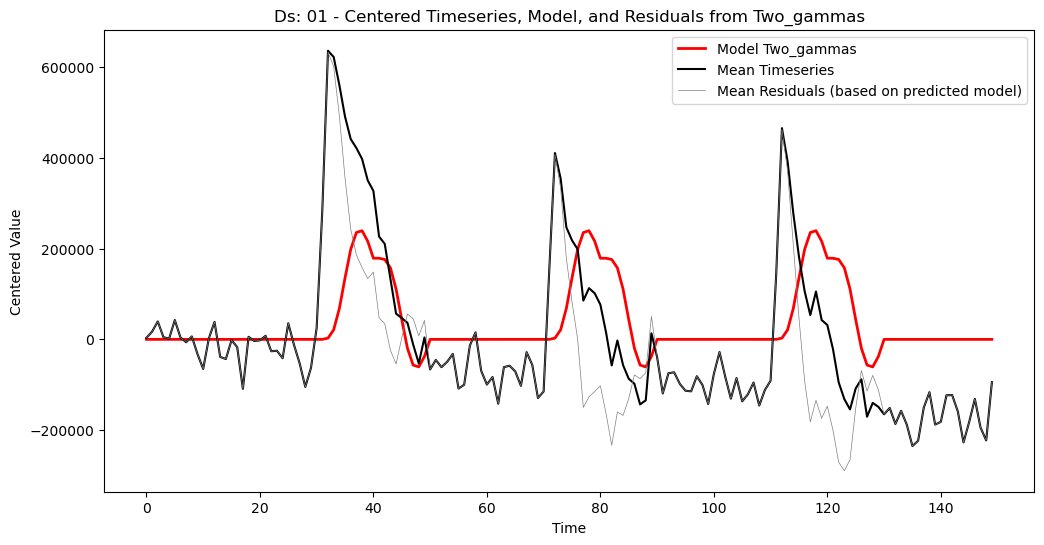

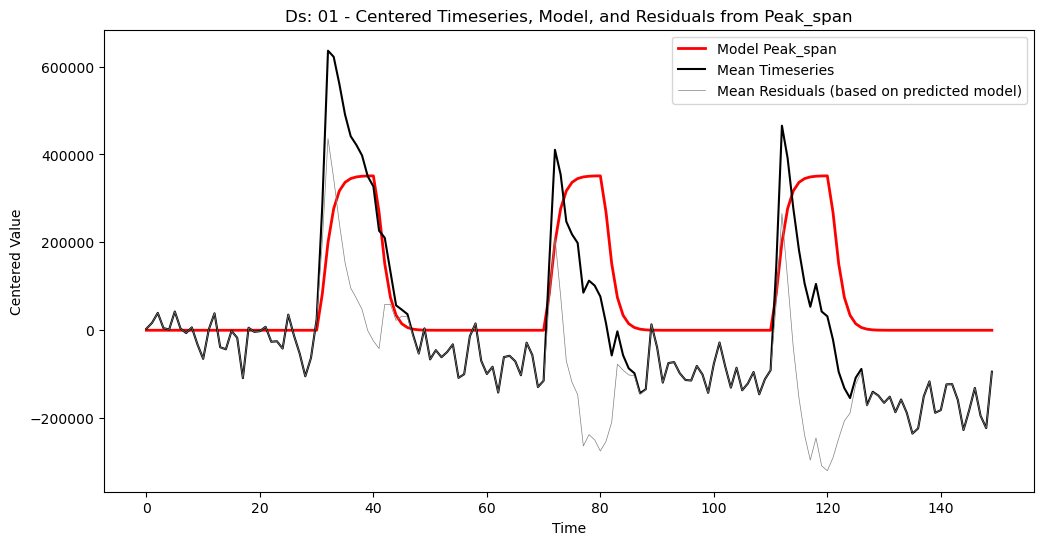

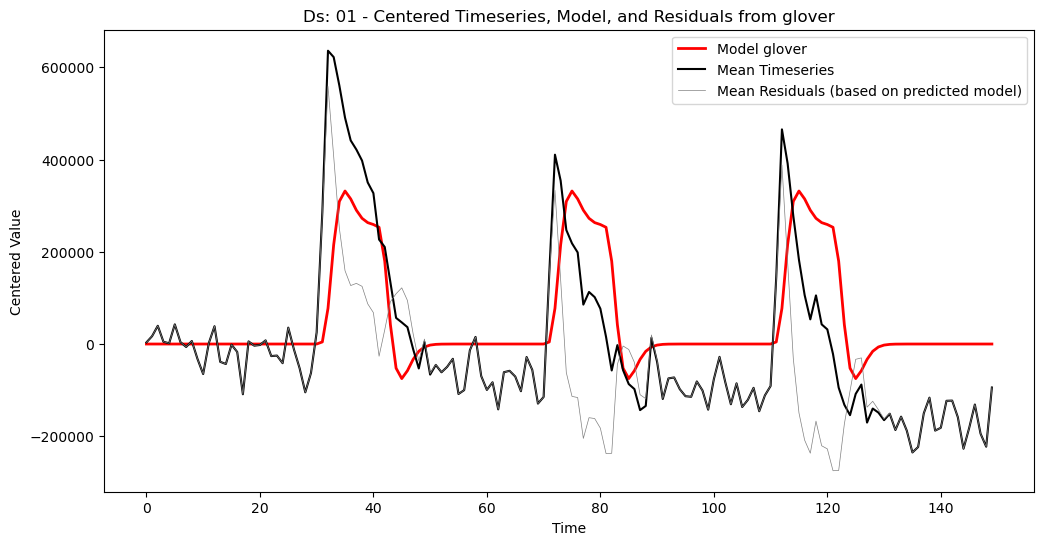

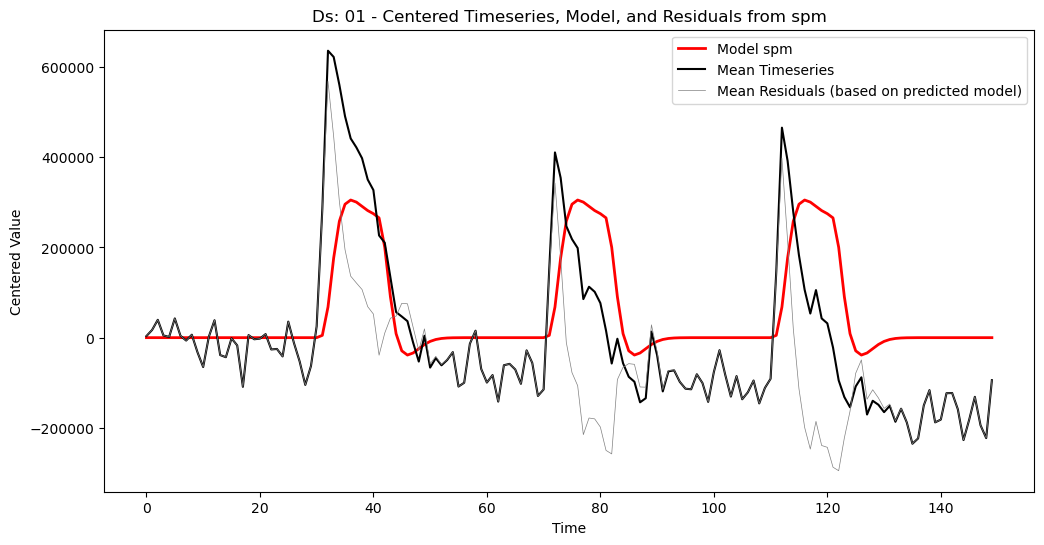

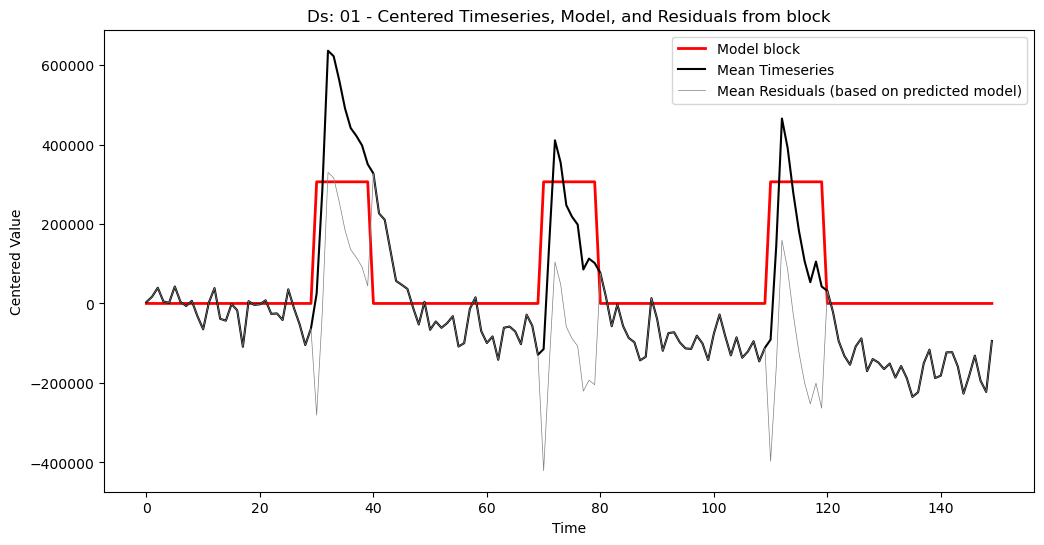

In [3]:
# --- Timeseries, Model and Residuals --- 

for hrf in hrfs:
    print('Processing HRF:', hrf)
    hrf_path = hrf_paths[hrf]
    
    for ds_num in range(1, 2): 
        ds = f'{ds_num:02d}'
        ds_subj = f'20{ds}00'

        # Load timeseries + design matrix
        timeseries = pd.read_csv(analysis_folder + f'/second_level/{hrf}/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).iloc[:, 0]
        design_matrix = pd.read_csv(first_level_path + f'{hrf}/matrix/matrix_sub-0{ds_subj}_ses-1.csv', header=None)

        if len(timeseries) > len(design_matrix):
            timeseries = timeseries.iloc[:len(design_matrix)]
        elif len(timeseries) < len(design_matrix):
            design_matrix = design_matrix.iloc[:len(timeseries)]
        
        # Fit model to timeseries to the matrix
        glm = LinearRegression()                            # Initialize a GLM 
        glm.fit(design_matrix, timeseries)                  # Fit the model to the timeseries using the design matrix
        
        # Extract the model and predict  
        model = design_matrix.iloc[:, 0] * glm.coef_[0]     # Fitted model (coefficients) 
        predicred_model = glm.predict(design_matrix)        # Predict the model using the design matrix

        # Compute residuals 
        residuals = timeseries - model

        # Save
        #model.to_csv(analysis_folder + f'/second_level/{hrf}/model/{hrf}-model_ds-{ds}.csv', index=False, header=False)
        #residuals.to_csv(analysis_folder + f'/second_level/{hrf}/mean_residuals/mean_residuals_ds-{ds}.csv', index=False, header=False)

        # Plot: timeseries, model, residuals
        plt.figure(figsize=(12, 6))
        plt.plot(model, label=f'Model {hrf}', linewidth=2, color='red')
        plt.plot(timeseries, label='Mean Timeseries', linewidth=1.5, color='black')
        plt.plot(residuals, label='Mean Residuals (based on predicted model)', linewidth=0.5, color='gray')
        plt.xlabel('Time')
        plt.ylabel('Centered Value')
        plt.title(f'Ds: {ds} - Centered Timeseries, Model, and Residuals from {hrf}')
        plt.legend()
        #plt.show()


#### Plot: timeseries, model, residuals

In [4]:
# --- Init variables --- 
second_level_path = '/project/4180000.19/multirat_stim/scratch/rabies_test/second_level/'

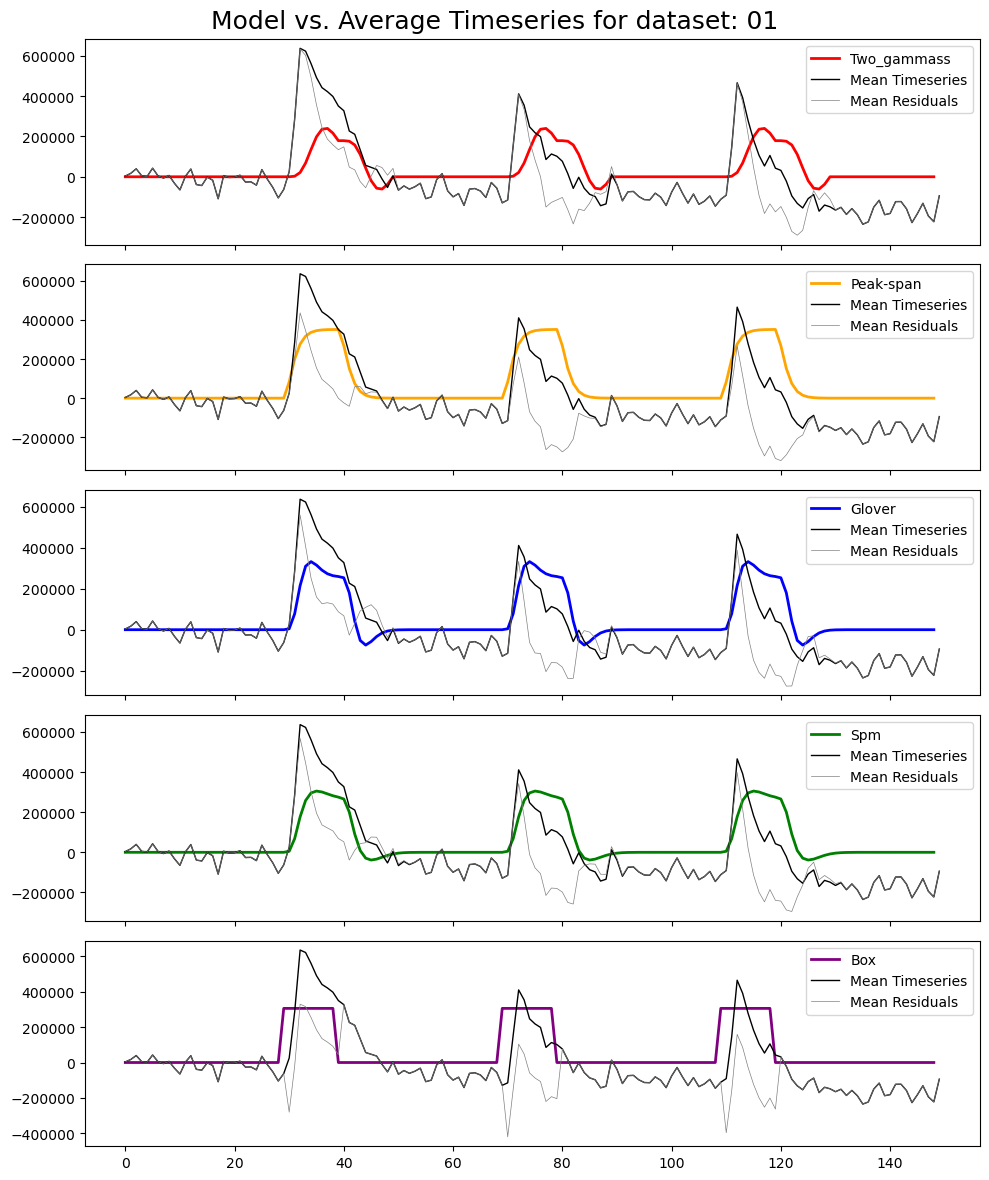

In [5]:
for ds_num in range(1, 2): 
    ds = f'{ds_num:02d}'
    #ds_subj = f'20{ds}00'

    # ds = '05'
    # ds_subj = f'20{ds}00'

    timeseries = pd.read_csv(analysis_folder + f'/second_level/Peak_span/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).iloc[:, 0]

    # --- Load data ---

    Two_gammas_model = pd.read_csv(second_level_path+f'Two_gammas/model/Two_gammas-model_ds-{ds}.csv').iloc[:,0]
    Two_gammas_residuals = pd.read_csv(second_level_path+f'/Two_gammas/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).squeeze()

    Peak_span_model = pd.read_csv(second_level_path+f'Peak_span/model/Peak_span-model_ds-{ds}.csv').iloc[:,0]
    Peak_residuals = pd.read_csv(second_level_path+f'/Peak_span/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    glover_model = pd.read_csv(second_level_path+f'glover/model/glover-model_ds-{ds}.csv').iloc[:,0]
    glover_residuals = pd.read_csv(second_level_path+f'/glover/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    spm_model = pd.read_csv(second_level_path+f'spm/model/spm-model_ds-{ds}.csv').iloc[:,0]
    spm_residuals = pd.read_csv(second_level_path+f'/spm/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    box_model = pd.read_csv(second_level_path+f'block/model/block-model_ds-{ds}.csv').iloc[:,0]
    box_residuals = pd.read_csv(second_level_path+f'/block/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

    # ---  Plot model --- 

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

    ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two_gammass')
    ax1.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax1.plot(Two_gammas_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
    ax2.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax2.plot(Peak_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax3.plot(glover_model, color='blue', linewidth=2, label='Glover' )
    ax3.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax3.plot(glover_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax4.plot(spm_model, color='green', linewidth=2, label='Spm' )
    ax4.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax4.plot(spm_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax5.plot(box_model, color='purple', linewidth=2, label='Box' )
    ax5.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
    ax5.plot(box_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    ax5.legend()
    ax5.legend()

    # ax1.set_ylim(-2.5, 4)
    # ax2.set_ylim(-2.5, 4)
    # ax3.set_ylim(-2.5, 4)
    # ax4.set_ylim(-2.5, 4)
    # ax5.set_ylim(-2.5, 4)

    fig.suptitle(f"Model vs. Average Timeseries for dataset: {ds}", fontsize=18)
    plt.tight_layout()

    #plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200) 
    plt.show()

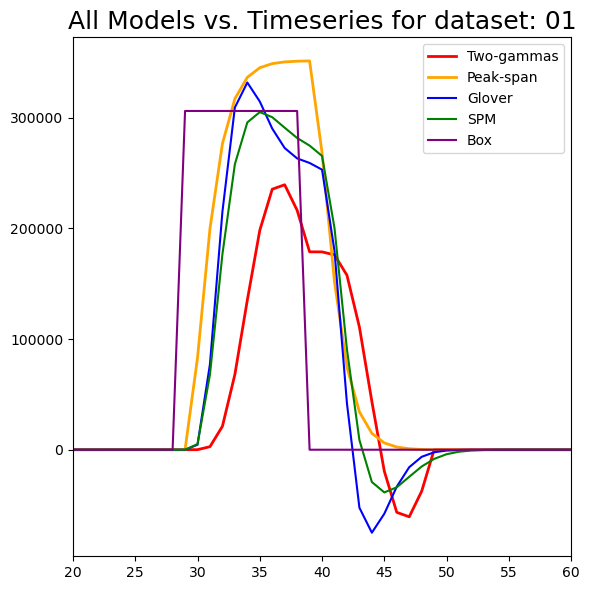

In [30]:
# Create a new figure for the combined plot
plt.figure(figsize=(6, 6))

# Plot all models on the same plot
plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span')
plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover')
plt.plot(spm_model, color='green', linewidth=1.5, label='SPM')
plt.plot(box_model, color='purple', linewidth=1.5, label='Box')

# Set x-axis limits to zoom in on the time interval between 80 and 120 seconds
plt.xlim(20, 60)
#plt.ylim(-0.5, 2)

plt.legend()
plt.title(f"All Models vs. Timeseries for dataset: {ds}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4/All_HRFs_timeseries_{ds}.svg', format='svg', dpi=1200)
plt.show()

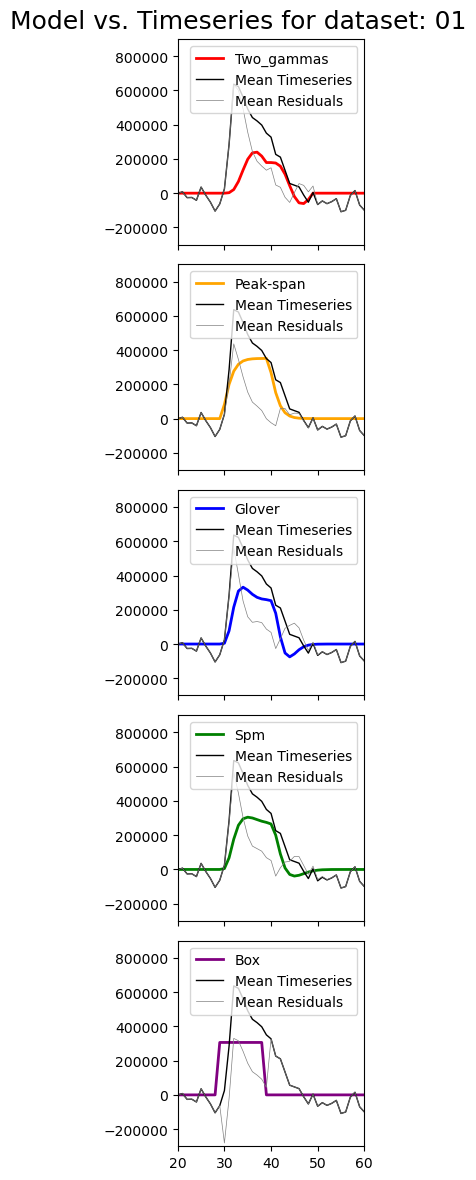

In [6]:
ds = '01'
TR = 2

timeseries = pd.read_csv(analysis_folder + f'/second_level/Peak_span/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).iloc[:, 0]

# --- Load data --- 

Two_gammas_model = pd.read_csv(second_level_path+f'Two_gammas/model/Two_gammas-model_ds-{ds}.csv').iloc[:,0]
Two_gammas_residuals = pd.read_csv(second_level_path+f'/Two_gammas/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).squeeze()

Peak_span_model = pd.read_csv(second_level_path+f'Peak_span/model/Peak_span-model_ds-{ds}.csv').iloc[:,0]
Peak_residuals = pd.read_csv(second_level_path+f'/Peak_span/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

glover_model = pd.read_csv(second_level_path+f'glover/model/glover-model_ds-{ds}.csv').iloc[:,0]
glover_residuals = pd.read_csv(second_level_path+f'/glover/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

spm_model = pd.read_csv(second_level_path+f'spm/model/spm-model_ds-{ds}.csv').iloc[:,0]
spm_residuals = pd.read_csv(second_level_path+f'/spm/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

box_model = pd.read_csv(second_level_path+f'block/model/block-model_ds-{ds}.csv').iloc[:,0]
box_residuals = pd.read_csv(second_level_path+f'/block/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]


# --- Plot ---

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(3, 12), sharex=True)

ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two_gammas')
ax1.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax1.plot(Two_gammas_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
ax2.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax2.plot(Peak_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax3.plot(glover_model, color='blue', linewidth=2, label='Glover' )
ax3.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax3.plot(glover_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax4.plot(spm_model, color='green', linewidth=2, label='Spm' )
ax4.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax4.plot(spm_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

ax5.plot(box_model, color='purple', linewidth=2, label='Box' )
ax5.plot(timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax5.plot(box_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# 01
ax1.set_xlim(20, 60)
ax2.set_xlim(20, 60)
ax3.set_xlim(20, 60)
ax4.set_xlim(20, 60)
ax5.set_xlim(20, 60)

ax1.set_ylim(-300000, 900000)
ax2.set_ylim(-300000, 900000)
ax3.set_ylim(-300000, 900000)
ax4.set_ylim(-300000, 900000)
ax5.set_ylim(-300000, 900000)


#02
# ax1.set_xlim(70, 110)
# ax2.set_xlim(70, 110)
# ax3.set_xlim(70, 110)
# ax4.set_xlim(70, 110)
# ax5.set_xlim(70, 110)

# ax1.set_ylim(-3, 9)
# ax2.set_ylim(-3, 9)
# ax3.set_ylim(-3, 9)
# ax4.set_ylim(-3, 9)
# ax5.set_ylim(-3, 9)


# 10
# ax1.set_xlim(80, 120)
# ax2.set_xlim(80, 120)
# ax3.set_xlim(80, 120)
# ax4.set_xlim(80, 120)
# ax5.set_xlim(80, 120)

# ax1.set_ylim(-200, 400)
# ax2.set_ylim(-200, 400)
# ax3.set_ylim(-200, 400)
# ax4.set_ylim(-200, 400)
# ax5.set_ylim(-200, 400)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()


fig.suptitle(f"Model vs. Timeseries for dataset: {ds}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4/HRFs_timeseries_{ds}.svg', format='svg', dpi=1200)
plt.show()

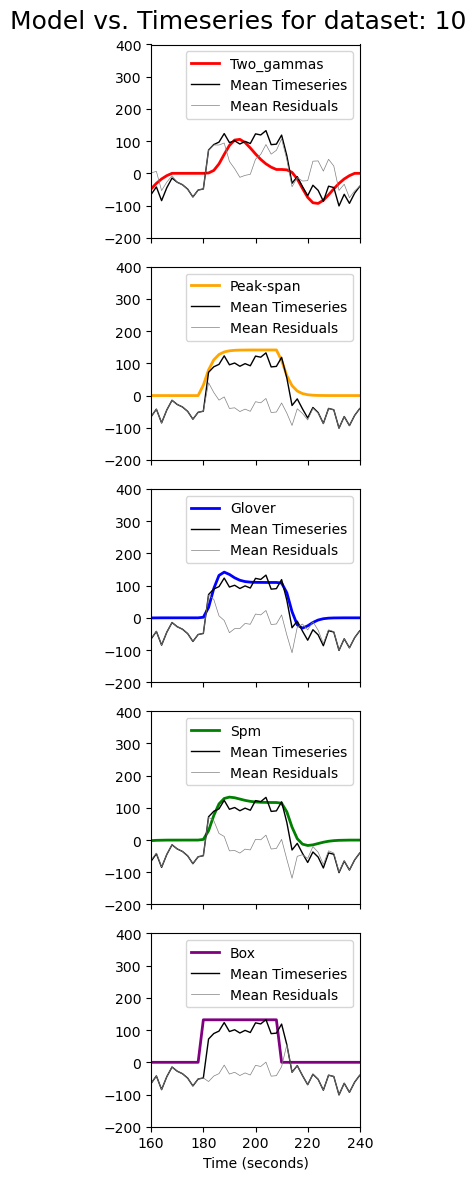

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set your repetition time (TR) in seconds, for example 2 seconds
TR = 2  
ds = '10'

# --- Load Timeseries and Models ---
timeseries = pd.read_csv(analysis_folder + f'/second_level/Peak_span/mean_timeseries/mean_timeseries_ds-{ds}.csv', header=None).iloc[:, 0]

Two_gammas_model = pd.read_csv(second_level_path+f'Two_gammas/model/Two_gammas-model_ds-{ds}.csv').iloc[:,0]
Two_gammas_residuals = pd.read_csv(second_level_path+f'/Two_gammas/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).squeeze()

Peak_span_model = pd.read_csv(second_level_path+f'Peak_span/model/Peak_span-model_ds-{ds}.csv').iloc[:,0]
Peak_residuals = pd.read_csv(second_level_path+f'/Peak_span/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

glover_model = pd.read_csv(second_level_path+f'glover/model/glover-model_ds-{ds}.csv').iloc[:,0]
glover_residuals = pd.read_csv(second_level_path+f'/glover/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

spm_model = pd.read_csv(second_level_path+f'spm/model/spm-model_ds-{ds}.csv').iloc[:,0]
spm_residuals = pd.read_csv(second_level_path+f'/spm/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

box_model = pd.read_csv(second_level_path+f'block/model/block-model_ds-{ds}.csv').iloc[:,0]
box_residuals = pd.read_csv(second_level_path+f'/block/mean_residuals/mean_residuals_ds-{ds}.csv', header=None).iloc[:, 0]

# --- Ensure same lengths between timeseries and models ---
min_length = min(len(timeseries), len(Two_gammas_model), len(Peak_span_model), 
                 len(glover_model), len(spm_model), len(box_model))

timeseries = timeseries[:min_length]
Two_gammas_model = Two_gammas_model[:min_length]
Two_gammas_residuals = Two_gammas_residuals[:min_length]
Peak_span_model = Peak_span_model[:min_length]
Peak_residuals = Peak_residuals[:min_length]
glover_model = glover_model[:min_length]
glover_residuals = glover_residuals[:min_length]
spm_model = spm_model[:min_length]
spm_residuals = spm_residuals[:min_length]
box_model = box_model[:min_length]
box_residuals = box_residuals[:min_length]

# --- Create time vector in seconds ---
time_in_seconds = np.arange(min_length) * TR

# --- Plot ---
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(3, 12), sharex=True)

# Two Gammas
ax1.plot(time_in_seconds, Two_gammas_model, color='red', linewidth=2, label='Two_gammas')
ax1.plot(time_in_seconds, timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax1.plot(time_in_seconds, Two_gammas_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# Peak Span
ax2.plot(time_in_seconds, Peak_span_model, color='orange', linewidth=2, label='Peak-span')
ax2.plot(time_in_seconds, timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax2.plot(time_in_seconds, Peak_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# Glover
ax3.plot(time_in_seconds, glover_model, color='blue', linewidth=2, label='Glover')
ax3.plot(time_in_seconds, timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax3.plot(time_in_seconds, glover_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# SPM
ax4.plot(time_in_seconds, spm_model, color='green', linewidth=2, label='Spm')
ax4.plot(time_in_seconds, timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax4.plot(time_in_seconds, spm_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# Box Model
ax5.plot(time_in_seconds, box_model, color='purple', linewidth=2, label='Box')
ax5.plot(time_in_seconds, timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax5.plot(time_in_seconds, box_residuals, color='grey', linewidth=0.5, label='Mean Residuals')

# 01
# ax1.set_xlim(40, 120)
# ax2.set_xlim(40, 120)
# ax3.set_xlim(40, 120)
# ax4.set_xlim(40, 120)
# ax5.set_xlim(40, 120)

# ax1.set_ylim(-300000, 900000)
# ax2.set_ylim(-300000, 900000)
# ax3.set_ylim(-300000, 900000)
# ax4.set_ylim(-300000, 900000)
# ax5.set_ylim(-300000, 900000)

# 02
# ax1.set_xlim(100, 160)
# ax2.set_xlim(100, 160)
# ax3.set_xlim(100, 160)
# ax4.set_xlim(100, 160)
# ax5.set_xlim(100, 160)

# ax1.set_ylim(-4, 9)
# ax2.set_ylim(-4, 9)
# ax3.set_ylim(-4, 9)
# ax4.set_ylim(-4, 9)
# ax5.set_ylim(-4, 9)

# 10
ax1.set_xlim(160, 240)
ax2.set_xlim(160, 240)
ax3.set_xlim(160, 240)
ax4.set_xlim(160, 240)
ax5.set_xlim(160, 240)

ax1.set_ylim(-200, 400)
ax2.set_ylim(-200, 400)
ax3.set_ylim(-200, 400)
ax4.set_ylim(-200, 400)
ax5.set_ylim(-200, 400)


# Add legends
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

# Add labels and title
plt.xlabel('Time (seconds)')
fig.suptitle(f"Model vs. Timeseries for dataset: {ds}", fontsize=18)
plt.tight_layout()

# Save the figure
plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4/HRFs_timeseries_{ds}.svg', format='svg', dpi=1200)

plt.show()
